  # Frequent Itemset Generation Algorithms

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
%store -r predict_dataset

In [4]:
predict_df = predict_dataset

In [5]:
print(predict_df.loc[14, 'content'])
print(predict_df.loc[14, 'clean_content'])
predict_df

I love this app. Helps pass time when I have nothing else to do. I can get lost in it for a bit of time. Sometimes gotta make myself get off the app 😂
['love', 'app', 'help', 'pass', 'time', 'lose', 'bit', 'time', 'gotta', 'make', 'app']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,cat1,inex1,clean_content,cat1_clean,target,predicted_bc,cat1_id,predicted
2,gp:AOqpTOF1KZT5ggeQqGpl62-V6QzBxhROn0eutiZMm9l...,izzyiscool,https://play-lh.googleusercontent.com/a-/AOh14...,I love this app like im addicted,5,0,NaN,2020-10-12 1:38:54,NaN,NaN,tiktok,addiction,internal,"[love, app, im, addict]",addiction,1,1.0,0,addiction
3,gp:AOqpTOFRuZB5C5PEpW09xVx3pts_63bcWm9DFf4rajR...,Kristopher Lyons,https://play-lh.googleusercontent.com/a-/AOh14...,"This app allows pedophile acts, underage half ...",1,17,17.9.5,2020-12-03 9:55:01,NaN,NaN,tiktok,inappropriate content,internal,"[app, pedophile, act, underage, half, naked, g...",inappropriate content,1,1.0,1,inappropriate content
8,gp:AOqpTOGpZZ_BDw5H51bdU4XRGKEdbuygkK9EfIltHR3...,Siobhan Leahy,https://play-lh.googleusercontent.com/-BXoIyax...,I'm addicted af tbh,5,0,17.3.3,2020-08-12 1:04:16,NaN,NaN,tiktok,addiction,internal,"[addict, af, tbh]",addiction,1,1.0,0,addiction
14,gp:AOqpTOEtgXH8WD_c-qgaFW44GQ7aH1Mw-xi3wTr-d2b...,Charity Sapp,https://play-lh.googleusercontent.com/a-/AOh14...,I love this app. Helps pass time when I have n...,5,0,NaN,2020-11-08 22:29:08,NaN,NaN,tiktok,addiction,internal,"[love, app, help, pass, time, lose, bit, time,...",addiction,1,1.0,0,addiction
17,gp:AOqpTOEaWN1lHNaz9ZYQBb-aoJ1Nt_BslSnDXFIRNsY...,Empyreusal,https://play-lh.googleusercontent.com/a-/AOh14...,"Terrible, it invades your privacy as badly as ...",1,1,NaN,2020-10-08 13:51:06,NaN,NaN,tiktok,privacy,internal,"[terrible, invade, privacy, badly, instagram, ...",privacy,1,1.0,2,privacy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,gp:AOqpTOEhPcIN_4oxoNR3DO9BfAs-XpV1aA4I-BfhWF6...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Your drivers are not responding to pool even n...,5,0,4.212.10002,2018-10-18 11:46:30,NaN,NaN,uber,scam,external,"[driver, respond, pool, cancel, trip, bear, fine]",scam,1,1.0,9,discrimination
2944,gp:AOqpTOFqWGHSIBAHTVbmiwTHkiY099tfWu_fX7lGtaK...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,All I have to say is that uber is horrible. Ho...,1,0,4.210.10002,2018-05-23 13:49:01,"Hi, we're always looking to improve your exper...",2018-05-25 14:04:53,uber,accountability,external,"[uber, horrible, assign, driver, complete, tri...",accountability,1,1.0,10,discrimination
2987,gp:AOqpTOH7D8zO2cZmr1xkTtQFHqeJjQXHxb0EYX9RuEY...,Rudraksh Bagga,https://play-lh.googleusercontent.com/a-/AOh14...,"This is the worst app I've ever used, the soun...",3,0,NaN,2020-09-18 15:41:45,NaN,NaN,zoom,privacy,internal,"[bad, app, sound, audible, video, clear, appan...",privacy,1,1.0,2,privacy
3030,gp:AOqpTOHKOD0Gq5ZwZPaDW9GmmNmdKeCHUNoXG3DTKY-...,Jenny Miller,https://play-lh.googleusercontent.com/-e8RtRve...,They will not restore my account I have lost p...,1,2,299.0.0.51.236,2020-12-13 22:29:55,NaN,NaN,facebook,privacy,internal,"[restore, account, lose, picture, recipe, birt...",privacy,1,1.0,2,accountability


In [6]:
def generate_appwords():
    stpwrds = ["app", "alexa", "facebook", 
                     "googlehome", "instagram", "linkedin", "tiktok", "tik", "tok", "uber", "youtube", "fb", 
               "dont", "yall", "kinda", "lot", "anymore", "doesnt", "tube", "blm", "thing"]
    return stpwrds

In [7]:
def remove_stopwords(text, stpwrds):
    #text = text.split(" ")
    words = [w for w in text if w not in stpwrds]
    return words

In [8]:
stpwrds = generate_appwords()
predict_df['clean_content'] = predict_df['clean_content'].apply(lambda x: remove_stopwords(x, stpwrds))

In [9]:
predict_df['clean_content']

2                                      [love, im, addict]
3       [pedophile, act, underage, half, naked, girl, ...
8                                       [addict, af, tbh]
14      [love, help, pass, time, lose, bit, time, gott...
17          [terrible, invade, privacy, badly, nightmare]
                              ...                        
2942    [driver, respond, pool, cancel, trip, bear, fine]
2944    [horrible, assign, driver, complete, trip, per...
2987    [bad, sound, audible, video, clear, appand, re...
3030    [restore, account, lose, picture, recipe, birt...
3054    [reason, act, stupid, make, video, login, put,...
Name: clean_content, Length: 417, dtype: object

In [10]:
# Create an empty dictionary to store the sub dataframes for each app
app_subdfs = {}

# Iterate over each unique app name
for app in predict_df['app_name'].unique():
    # Filter the dataframe for the current app
    sub_df = predict_df[predict_df['app_name'] == app]
    # Store the sub dataframe in the dictionary with the app name as the key
    app_subdfs[app] = sub_df

### One-hot encoding transaction data
corpus_list here transformed into a one-hot encoded data frame, where each column consists of true and false values that indicate whether a word was included in a review. 

In [11]:
app_corpus_list = {}
def create_corpus(df,  concern: bool = False):
    for app in app_subdfs.keys():
        if concern:
            for index, row in app_subdfs[app].iterrows():
                row["clean_content"].append(row["predicted"])
        corpus_list = app_subdfs[app]["clean_content"].tolist()
        app_corpus_list[app] = corpus_list
    return app_corpus_list

app_corpus_list = create_corpus(app_subdfs, concern=True)
app_corpus_list

{'tiktok': [['love', 'im', 'addict', 'addiction'],
  ['pedophile',
   'act',
   'underage',
   'half',
   'naked',
   'girl',
   'inappropriate',
   'content',
   'take',
   'trump',
   'video',
   'community',
   'guideline',
   'inappropriate content'],
  ['addict', 'af', 'tbh', 'addiction'],
  ['love',
   'help',
   'pass',
   'time',
   'lose',
   'bit',
   'time',
   'gotta',
   'make',
   'addiction'],
  ['terrible', 'invade', 'privacy', 'badly', 'nightmare', 'privacy'],
  ['addict', 'addiction'],
  ['fun',
   'watch',
   'everyday',
   'addict',
   'watch',
   'make',
   'video',
   'addiction'],
  ['love',
   'abuse',
   'privacy',
   'right',
   'lol',
   'yeah',
   'im',
   'concern',
   'entertainment',
   'meet',
   'awsome',
   'personality',
   'lolol',
   'lonny',
   'howe',
   'regina',
   'saskatchewan',
   'canada',
   'privacy'],
  ['addict', 'addiction'],
  ['horrible',
   'customer',
   'service',
   'follow',
   'community',
   'guideline',
   'dangerous',
   'med

In [12]:
# Create an empty dictionary to store the sub dataframes for each app
app_corpus_subdfs = {}
te = TransactionEncoder()
for app in app_subdfs.keys():
    print(app)
    te_ary = te.fit(app_corpus_list[app]).transform(app_corpus_list[app])
    corpus_df = pd.DataFrame(te_ary, columns=te.columns_)
    app_corpus_subdfs[app] = corpus_df
    print(corpus_df.shape)

tiktok
(182, 844)
facebook
(54, 463)
uber
(64, 588)
zoom
(11, 82)
vinted
(13, 89)
alexa
(4, 48)
googlehome
(3, 21)
linkedin
(11, 92)
instagram
(30, 209)
youtube
(45, 355)


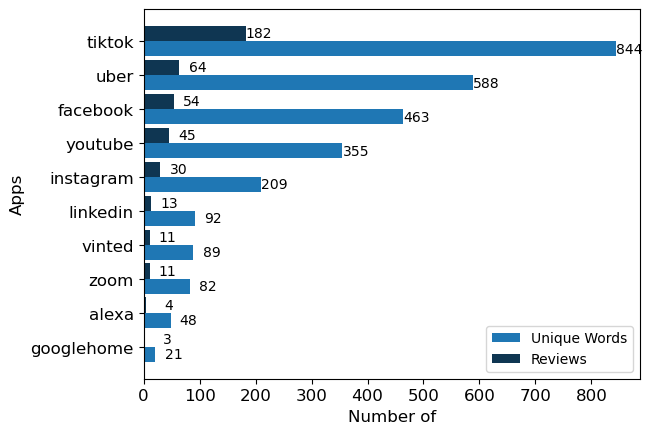

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list to store the number of unique words for each app
unique_words_app = {}

# Iterate over the sub-dataframes
for app, sub_df in app_corpus_subdfs.items():
    unique_words_app[app] = len(sub_df.columns)
unique_words_app = sorted(unique_words_app.items(), key=lambda x: x[1], reverse=True)
unique_words_app = dict(unique_words_app)
# Sort the unique_words_app dictionary by values in descending order
unique_words_app_list = sorted(unique_words_app.items(), key=lambda x: x[1], reverse=False)

# Create a list to store the number of reviews for each app
no_review_app = {}

# Iterate over the sub-dataframes
for app, sub_df in app_corpus_subdfs.items():
    no_review_app[app] = len(sub_df.index)
no_review_app = sorted(no_review_app.items(), key=lambda x: x[1], reverse=True)
no_review_app = dict(no_review_app)
# Sort the no_review_app dictionary by values in descending order
no_review_app_list = sorted(no_review_app.items(), key=lambda x: x[1], reverse=False)

# Extract the sorted apps and counts for unique words
apps_unique_words = [app for app, count in unique_words_app_list]
counts_unique_words = [count for app, count in unique_words_app_list]

# Extract the sorted apps and counts for reviews
apps_reviews = [app for app, count in no_review_app_list]
counts_reviews = [count for app, count in no_review_app_list]

# Set the width of the bars
bar_width = 0.45

# Create an array of indices for the x-axis ticks
ind = np.arange(len(apps_unique_words))

# Create the figure and axes

fig, ax = plt.subplots()
# Plot the bars for unique words
bars_unique_words = ax.barh(ind, counts_unique_words, bar_width, color='#1f77b4', label='Unique Words')

# Plot the bars for reviews
bars_reviews = ax.barh(ind + bar_width, counts_reviews, bar_width, color='#0f3652', label='Reviews')

# Add value labels to each bar for unique words
for count, bar in zip(counts_unique_words, bars_unique_words):
    ax.text(bar.get_width() + 48 , bar.get_y() + bar.get_height() / 2 , str(count), ha='right', va='center')

# Add value labels to each bar for reviews
for count, bar in zip(counts_reviews, bars_reviews):
    ax.text(bar.get_width() + 48 , bar.get_y() + bar.get_height() / 2 , str(count), ha='right', va='center')

# Set the y-axis ticks and labels
ax.set_yticks(ind + bar_width / 2)
ax.set_yticklabels(apps_unique_words)

plt.xlabel('Number of', fontsize=12)  # Increase font size to 12
plt.ylabel('Apps', fontsize=12)  # Increase font size to 12

# Increase font size of tick labels on both axes
ax.tick_params(axis='x', labelsize=12)  # Increase x-axis tick label font size to 10
ax.tick_params(axis='y', labelsize=12)  # Increase y-axis tick label font size to 10

# Set the chart title
#ax.set_title('Number of Unique Words and Reviews for Each App')

# Set the legend
ax.legend()

# Display the chart
plt.show()


### Remove some apps

In [14]:
del app_corpus_subdfs['googlehome']
del app_corpus_subdfs['zoom']
del app_corpus_subdfs['linkedin']
del app_corpus_subdfs['instagram']
del app_corpus_subdfs['alexa']
del app_corpus_subdfs['vinted']

In [15]:
app_corpus_subdfs.keys()

dict_keys(['tiktok', 'facebook', 'uber', 'youtube'])

### Frequency of the words & Support metric

In [16]:
te = TransactionEncoder()
app_word_counts_subdfs = {}
app_support_counts_subdfs = {}
for app in app_corpus_subdfs.keys():
    word_counts = app_corpus_subdfs[app].sum()
# Create a new dataframe to store the word counts
    word_counts_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

# Calculate the total number of transactions
    total_transactions = len(app_corpus_subdfs[app].index)
# Calculate the support for each word
    word_counts_df['Support'] = word_counts_df['Count'] / total_transactions
    
# Sort the dataframe by the word support in descending order
    word_counts_df = word_counts_df.sort_values('Support', ascending=False)
    app_word_counts_subdfs[app] = word_counts_df
    #print(app_word_counts_subdfs)
    support_counts = word_counts_df.groupby(word_counts_df['Support'].round(3))['Word'].nunique().reset_index()
    app_support_counts_subdfs[app] = support_counts
    #print(app_support_counts_subdfs)


# Print the DataFrame with word counts and their respective supports
#word_counts_df
#app_support_counts_subdfs['youtube']


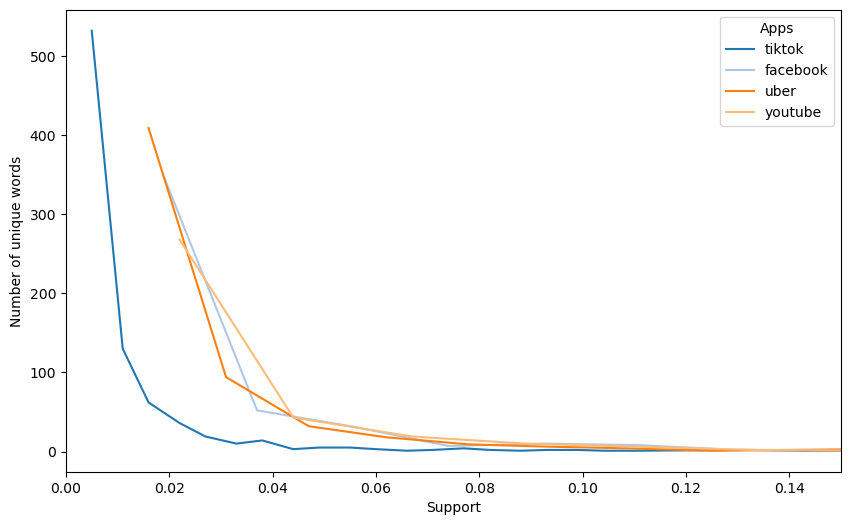

In [17]:
# Plot the number of unique words for each support value
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
color_palette = sns.color_palette("tab20", len(app_support_counts_subdfs.keys()))
for app, color in zip(app_support_counts_subdfs.keys(), color_palette):
    app_df = app_support_counts_subdfs[app]
    plt.plot(app_df['Support'], app_df['Word'], color=color,  label=app)
plt.xlabel('Support')
plt.ylabel('Number of unique words')
#plt.title('Number of Unique Words for Support Value')
plt.xticks(minor=True)
#plt.yscale('log')
# Format x-axis as percentages
#plt.gca().xaxis.set_major_formatter('{:.3f}'.format)
plt.xlim(0,0.15)
plt.legend(title='Apps')
plt.show()


### Finding frequent itemsets with Apriori

In [18]:
frequent_itemsets_subdfs = {}
start_time = time.time()
# max_len = 2 could be used to get only top rules
support_app = [0.02, 0.04, 0.04, 0.04]
#for app in app_corpus_subdfs:
for app, support in zip(app_corpus_subdfs, support_app):
    print(app, support, len(app_corpus_subdfs[app]))
    frequent_itemsets = apriori(app_corpus_subdfs[app], min_support = support, use_colnames=True, low_memory=True)
    ## 0.001 rumtime error

    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    print("the number of frequent itemsets generated:", len(frequent_itemsets))
    #frequent_itemsets = frequent_itemsets[frequent_itemsets['length']> 1]
    frequent_itemsets_subdfs[app] = frequent_itemsets
print("---Runtime: %s seconds ---" % (time.time() - start_time))

tiktok 0.02 182
the number of frequent itemsets generated: 327
facebook 0.04 54
the number of frequent itemsets generated: 117
uber 0.04 64
the number of frequent itemsets generated: 333
youtube 0.04 45
the number of frequent itemsets generated: 375
---Runtime: 0.048796892166137695 seconds ---


In [19]:
frequent_itemsets_counts_subdfs = {}
for app in frequent_itemsets_subdfs:
    frequent_itemsets_counts = frequent_itemsets_subdfs[app].groupby(['length']).size().reset_index(name='no. itemsets')
    frequent_itemsets_counts_subdfs[app] = frequent_itemsets_counts
    
# Convert dictionary to DataFrame
frequent_itemsets_all_df = pd.concat({k: pd.DataFrame(v) for k, v in frequent_itemsets_counts_subdfs.items()}, axis=0)

# Reset index
frequent_itemsets_all_df.reset_index(level=1, inplace=True)
frequent_itemsets_all_df.rename(columns={'level_1': 'app'}, inplace=True)
frequent_itemsets_all_df.to_csv('frequent_itemsets_counts.csv')
frequent_itemsets_all_df


,app,length,no. itemsets
tiktok,0,1,120
tiktok,1,2,141
tiktok,2,3,56
tiktok,3,4,10
facebook,0,1,64
facebook,1,2,41
facebook,2,3,11
facebook,3,4,1
uber,0,1,85
uber,1,2,162


### APRIORI

In [ ]:
support_app = [0.02, 0.04, 0.04, 0.04]
for app, support in zip(app_corpus_subdfs, support_app):
    print(app)
    %timeit -n 100 -r 10 apriori(app_corpus_subdfs[app], min_support=support, low_memory=True)


tiktok


### FP-GROWTH

In [ ]:
support_app = [0.02, 0.04, 0.04, 0.04]
from mlxtend.frequent_patterns import fpgrowth
for app, support in zip(app_corpus_subdfs, support_app):
    print(app)
    %timeit -n 100 -r 10 fpgrowth(app_corpus_subdfs[app], min_support=support)